In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def visualize_points(weights, points_x, label_y, title=None):
       
    plt.figure()
    plt.scatter(points_x[0, label_y > 0], points_x[1, label_y > 0], label='Class A', s=10)
    plt.scatter(points_x[0, label_y < 0], points_x[1, label_y < 0], label='Class B', s=10)
 
    if weights is not None:
        x_range = np.linspace(np.min(points_x[0,:]), np.max(points_x[0,:]), 100)
        y_range = (-weights[2] - weights[0]*x_range) / weights[1]
        plt.plot(x_range, y_range, label='Decision boundary')
        
    plt.legend()
    plt.grid(True)
    plt.tight_layout()   
    if title != None:
        plt.title(title)
    plt.show()


In [3]:
#Generate data linearly separable data
def gen_data(linear=True):
    if linear:
        n = 100  
        mA = np.array([1.0, 0.5])
        sigmaA = 0.35
        mB = np.array([-1.0, 0.0])
        sigmaB = 0.35
    else:
        n = 100
        mA = np.array([1.0, 0.3])
        sigmaA = 0.4
        mB = np.array([0.0, -0.1])
        sigmaB = 0.4


    classA = np.ones((n,3))
    classB = np.ones((n,3))
    # Generate classA and classB
    classA[:,0] = np.random.randn(n) * sigmaA + mA[0]
    classA[:,1] = np.random.randn(n) * sigmaA + mA[1]
    classB[:,0] = np.random.randn(n) * sigmaB + mB[0]
    classB[:,1] = np.random.randn(n) * sigmaB + mB[1]

    # Combine the data
    X = np.vstack((classA, classB))  # All input patterns
    T = np.hstack((np.ones(n), -np.ones(n)))  # Labels: +1 for A, -1 for B

    perm = np.random.permutation(2 * n)

    X,T = X[perm].T, T[perm].T

    # Plot
    plt.scatter(classA[:,0], classA[:,1], label='Class A')
    plt.scatter(classB[:,0], classB[:,1],  label='Class B')
    plt.legend()
    plt.show()

    return X, T

def gen_base_data():
    n = 100
    
    # Generate class A
    mA = np.array([1.0, 0.3])
    sigmaA = 0.2
    mB = np.array([0.0, -0.1])
    sigmaB = 0.3
    
    # Initialize class A with bias term
    classA = np.ones((n, 3))
    half_n = round(0.5 * n)
    
    # Generate split distribution for class A
    classA[:half_n, 0] = np.random.randn(half_n) * sigmaA - mA[0]  # Left cluster
    classA[half_n:, 0] = np.random.randn(n - half_n) * sigmaA + mA[0]  # Right cluster
    classA[:, 1] = np.random.randn(n) * sigmaA + mA[1]  # Second coordinate
    
    # Generate class B
    classB = np.ones((n, 3))
    classB[:, 0] = np.random.randn(n) * sigmaB + mB[0]
    classB[:, 1] = np.random.randn(n) * sigmaB + mB[1]

    # Plot the data
    plt.figure(figsize=(10, 7))
    plt.scatter(classA[:, 0], classA[:, 1], label='Class A')
    plt.scatter(classB[:, 0], classB[:, 1], label='Class B')
    plt.xlabel('x₁')
    plt.ylabel('x₂')
    plt.title(f'Original Non-linearly Separable Data')
    plt.legend()
    plt.grid(True)
    plt.show()

    return classA, classB


def gen_non_lin_data(classA, classB, subsample_scenario=None, n=100):
    """
    Generate non-linearly separable data with different subsampling scenarios.
    
    Parameters:
    subsample_scenario : str or None
        'random_25': Remove random 25% from each class
        'classA_50': Remove random 50% from class A
        'classB_50': Remove random 50% from class B
        'classA_split': Remove 20% from classA(x<0) and 80% from classA(x>0)
        None: No subsampling
    """
    
    # Apply subsampling based on scenario
    if subsample_scenario == 'random_25':
        # Remove random 25% from each class
        num_remove = int(0.25 * n)
        remove_idx_A = np.random.choice(n, num_remove, replace=False)
        remove_idx_B = np.random.choice(n, num_remove, replace=False)
        classA = np.delete(classA, remove_idx_A, axis=0)
        classB = np.delete(classB, remove_idx_B, axis=0)
        
    elif subsample_scenario == 'classA_50':
        # Remove random 50% from class A
        num_remove = int(0.5 * n)
        remove_idx = np.random.choice(n, num_remove, replace=False)
        classA = np.delete(classA, remove_idx, axis=0)
        
    elif subsample_scenario == 'classB_50':
        # Remove random 50% from class B
        num_remove = int(0.5 * n)
        remove_idx = np.random.choice(n, num_remove, replace=False)
        classB = np.delete(classB, remove_idx, axis=0)
        
    elif subsample_scenario == 'classA_split':
        # Find indices where classA(1,:) < 0 and > 0
        left_idx = np.where(classA[:, 0] < 0)[0]
        right_idx = np.where(classA[:, 0] > 0)[0]
        
        # Remove 20% from left side and 80% from right side
        num_remove_left = int(0.2 * len(left_idx))
        num_remove_right = int(0.8 * len(right_idx))
        
        remove_idx_left = np.random.choice(left_idx, num_remove_left, replace=False)
        remove_idx_right = np.random.choice(right_idx, num_remove_right, replace=False)
        remove_idx = np.concatenate([remove_idx_left, remove_idx_right])
        classA = np.delete(classA, remove_idx, axis=0)
    
    len_A = len(classA)
    len_B = len(classB)

    # Combine classes and create labels
    X = np.vstack((classA, classB))
    T = np.hstack((np.ones(len_A), -np.ones(len_B)))

    # Random permutation
    perm = np.random.permutation(len(X))
    X, T = X[perm], T[perm]

    return X.T, T, len_A, len_B


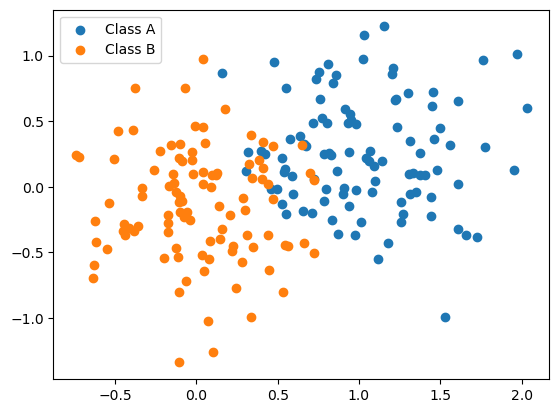

In [4]:
# X, T = gen_data()  # Linearly separable
X, T = gen_data(linear=False)  # Non-linearly separable

In [5]:
def plot_learning_rate(mse,title, ylabel):
    x = np.arange(1,len(mse)+1)

    plt.plot(x,mse)
    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [6]:
def perceptron(X, T, epochs=10, lr=0.1, verbose=True):
    # Generate random weights
    W = np.random.randn(X.shape[0])
    if verbose:
        visualize_points(W, X, T, f'Initial decision boundary for Perceptron')

    for epoch in range(1, epochs + 1):
        converged = True
        for i in range(X.shape[1]):  # Loop through each sample
            T_pred = np.sign(np.dot(W, X[:, i]))
            if T_pred != T[i]:  # Update weights if misclassified
                W += lr * T[i] * X[:, i]
                converged = False
        if converged:
            print(f"Converged at epoch {epoch}")
            break
    if verbose:
        plot_learning_rate(W, f'Learning rate for Perceptron', 'Learning rate')
        visualize_points(W, X, T, f'Final decision boundary for Perceptron')
    return W

In [7]:
def delta_seq(X, T, epochs=20, lr=0.001, verbose=True):
    # Generate random weights
    W = np.random.randn(X.shape[0])
    W[2] = 1
    mse = np.zeros(epochs)
    if verbose:
        visualize_points(W, X, T, title = "Initial boundary for sequential delta")

    for epoch in range(1, epochs + 1):
        for i in range(X.shape[1]):  # Loop through each sample
            T_pred = np.dot(W, X[:, i])
            W += lr * (T[i] - T_pred) * X[:, i]

        T_pred = np.dot(W, X)
        errors = (T - T_pred)
        epoch_mse = np.mean(errors**2)
        mse[epoch-1] = epoch_mse
        #print(f"MSE = {epoch_mse}")
        if np.sum(errors) < 1e-1:
            print(f"Converged at epoch {epoch}")
            break
    if verbose:
        plot_learning_rate(mse, title = f"Sequential learning, lr = {lr}", ylabel = "MSE" )
        visualize_points(W, X, T, title = "Final boundary for sequential delta")
    return W, mse

In [8]:
def delta_batch(X, T, epochs=20, lr=0.001, verbose=True):
    # Generate random weights
    # W = np.random.randn(X.shape[0])
    W = np.ones(X.shape[0])
    mse = np.zeros(epochs)
    if verbose:
        visualize_points(W, X, T, f'Initial boundary for batch delta')

    for epoch in range(1, epochs + 1):
        T_pred = np.dot(W, X)
        errors = (T - T_pred)
        W += lr * errors @ X.T
        
        epoch_mse = np.mean(errors**2)
        mse[epoch-1] = epoch_mse
        #print(f"MSE = {epoch_mse}")
        # if np.sum(errors) == 0:
        #     print(f"Converged at epoch {epoch}")
        #     break
        
    # # Print accuracy rate for each class independently
    # print(f"Class A accuracy: {np.mean(T_pred[:len_A] > 0)}")
    # print(f"Class B accuracy: {np.mean(T_pred[len_B:] < 0)}")

    if verbose:
        plot_learning_rate(mse, title = f"Batch learning, lr = {lr}", ylabel = "MSE" )
        visualize_points(W, X, T, title = "Final boundary for batch delta")
        
    return W, mse

In [9]:
# Create a target matrix class A = (-1, 1)^T, class B = (1, -1)^T, class C = (1, 1)^T
target_matrix = np.array([[1, -1], [-1, 1], [1, 1]]).T

# Create a weight matrix
W = np.ones((2, 3))

# Creata 3 data points
X = np.array([[-1, 1, 1], [1, -1, 1]])

# Delta rule batch
W, mse = delta_batch(X, target_matrix, epochs=20, lr=0.4, verbose=False)

ValueError: non-broadcastable output operand with shape (2,) doesn't match the broadcast shape (2,2)

In [ ]:
w_p = perceptron(X, T, epochs=40)

In [10]:
# w_s = delta_seq(X,T, epochs=40)

In [11]:
# lr_list = np.linspace(0.001,0.1, num =4)

# fig,ax = plt.subplots(len(lr_list),2, figsize=(20,20))

# for i, lr in enumerate(lr_list):
#     w_s, mse_s = delta_seq(X,T, epochs=40, lr = lr, verbose=False)
#     w_b,mse_b = delta_batch(X,T, epochs=40, lr = lr, verbose=False)
    
#     x_s = np.arange(1,len(mse_s)+1)
#     x_b = np.arange(1,len(mse_b)+1)

#     ax[i][0].plot(x_b,mse_b)
#     ax[i][0].set_xlabel("Epoch", fontsize = 20)
#     ax[i][0].set_ylabel("MSE", fontsize = 20)
#     ax[i][0].set_title(f"Batch learning, lr = {lr}",fontsize=25)
#     ax[i][0].tick_params(axis='x', labelsize=20)
#     ax[i][0].tick_params(axis='y', labelsize=20)

#     ax[i][1].plot(x_s,mse_s)
#     ax[i][1].set_xlabel("Epoch", fontsize = 20)
#     ax[i][1].set_ylabel("MSE", fontsize = 20)
#     ax[i][1].set_title(f"Sequential learning, lr = {lr}", fontsize=25)
#     ax[i][1].tick_params(axis='x', labelsize=20)
#     ax[i][1].tick_params(axis='y', labelsize=20)

# fig.tight_layout()
# fig.show()


In [12]:
def eval_data(X, W, lenA, lenB):
    T_pred = np.dot(W, X)
    classA_pred = T_pred[:lenA]
    classB_pred = T_pred[lenB:]
    classA_acc = np.mean(classA_pred > 0)
    classB_acc = np.mean(classB_pred < 0)

    return {'classA_acc': classA_acc, 'classB_acc': classB_acc}


In [13]:
def run_subsample_exp(n_runs):
    # List of scenarios to test
    scenarios = ['random_25', 'classA_50', 'classB_50', 'classA_split']
    results = {scenario: [] for scenario in scenarios}

    # Generate original data
    classA, classB = gen_base_data()

    for scenario in scenarios:
        for i in range(n_runs):
            X, T, len_classA, len_classB = gen_non_lin_data(classA, classB, scenario)
            w_b, mse_b = delta_batch(X, T, len_classA, len_classB, epochs=300, lr=0.001, verbose=True)
            train_acc = eval_data(X, w_b, len_classA, len_classB)

            X_full, T_full, len_classA_full, len_classB_full = gen_non_lin_data(classA, classB)
            test_acc = eval_data(X_full, w_b, len_classA_full, len_classB_full)

            results[scenario].append({'train_acc': train_acc, 'test_acc': test_acc})

            print(f"Scenario: {scenario}, Run: {i+1}")
            print(f"Train accuracy: Class A: {train_acc['classA_acc']}, Class B: {train_acc['classB_acc']}")


    return results

In [14]:
def analyze_results(result):
    # Calculate average train and test accuracy for each scenario
    avg_results = {}

    for scenario, runs in result.items():
        avg_train_acc_A = np.mean([run['train_acc']['classA_acc'] for run in runs])
        avg_train_acc_B = np.mean([run['train_acc']['classB_acc'] for run in runs])
        avg_test_acc_A = np.mean([run['test_acc']['classA_acc'] for run in runs])
        avg_test_acc_B = np.mean([run['test_acc']['classB_acc'] for run in runs])

        avg_results[scenario] = {'train_acc_A': avg_train_acc_A, 'train_acc_B': avg_train_acc_B,
                                 'test_acc_A': avg_test_acc_A, 'test_acc_B': avg_test_acc_B}
    
    # Print results as a bar plot
    train_acc_A = [avg_results[scenario]['train_acc_A'] for scenario in result.keys()]
    train_acc_B = [avg_results[scenario]['train_acc_B'] for scenario in result.keys()]
    test_acc_A = [avg_results[scenario]['test_acc_A'] for scenario in result.keys()]
    test_acc_B = [avg_results[scenario]['test_acc_B'] for scenario in result.keys()]

    x = np.arange(len(result.keys()))
    width = 0.35

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot train accuracy
    ax1.bar(x - width/2, train_acc_A, width, label='Class A')
    ax1.bar(x + width/2, train_acc_B, width, label='Class B')
    ax1.set_xticks(x)
    ax1.set_xticklabels(result.keys())
    ax1.set_ylabel('Accuracy')
    ax1.set_title('Average Train Accuracy')
    ax1.legend()

    # Plot test accuracy
    ax2.bar(x - width/2, test_acc_A, width, label='Class A')
    ax2.bar(x + width/2, test_acc_B, width, label='Class B')
    ax2.set_xticks(x)
    ax2.set_xticklabels(result.keys())
    ax2.set_ylabel('Accuracy')
    ax2.set_title('Average Test Accuracy')
    ax2.legend()

    plt.tight_layout()
    plt.show()
    

In [ ]:
result = run_subsample_exp(5)
analyze_results(result)